In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

%matplotlib inline

In [2]:
def adf_mean_reversion(df, col):
    adf_results = ts.adfuller(df[col], 1)
    return adf_results[1], adf_results[4]['1%']

In [4]:
def plot_acf_pacf_assets(df, col='', title=''):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(df[col].values.squeeze(), lags=40, ax=ax1)
    ax1.set_title(title + ' ACF')
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(df[col].values, lags=40, ax=ax2)
    ax2.set_title(title + ' PACF')

In [5]:
df_jp_emb = pd.read_excel('data/assets/Bond_JP_Morgan_EMB.xlsx').set_index('Date')
df_us_barc_etf = pd.read_excel('data/assets/Bond_US_Barclay_ETF.xlsx').set_index('Date')
df_us_barc_tips = pd.read_excel('data/assets/Bond_US_Barclay_TIPS.xlsx').set_index('Date')
df_us_hy_bond = pd.read_excel('data/assets/Bond_US_HighYield_bond_Index.xlsx').set_index('Date')
df_global_msci = pd.read_excel('data/assets/Equity_global_MSCI_ACWI.xlsx').set_index('Date')
df_russel_3000 = pd.read_csv('data/assets/Equity_russel 3000.csv').set_index('Date')
df_fof = pd.read_excel('data/assets/FOF_Fund of Fund.xlsx').set_index('Date')
df_pe_PEX = pd.read_csv('data/assets/PE_PEX_iShare_2013_2017.csv').set_index('Date')
df_re_iyr = pd.read_csv('data/assets/Real Estate_IYR_real_estate_ETF iShares U.S. Real Estate ETF.csv').set_index('Date')

df_jp_emb.drop('Unnamed: 2', axis=1, inplace=True)
df_russel_3000 = pd.DataFrame(df_russel_3000['Adj Close'])
df_pe_PEX = pd.DataFrame(df_pe_PEX['Adj Close'])
df_re_iyr = pd.DataFrame(df_re_iyr['Adj Close'])

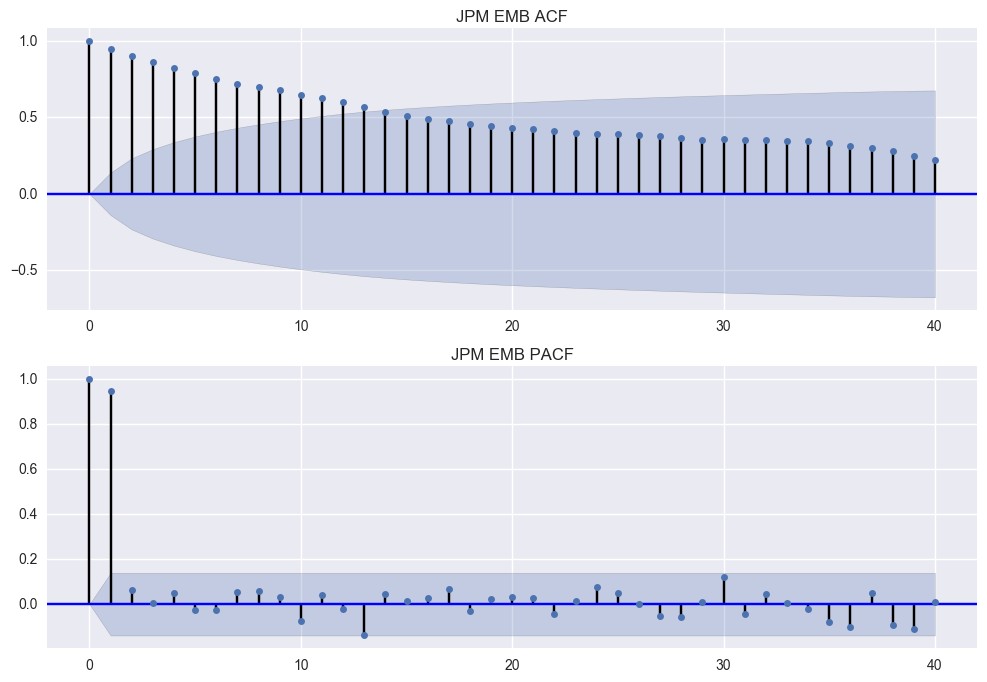

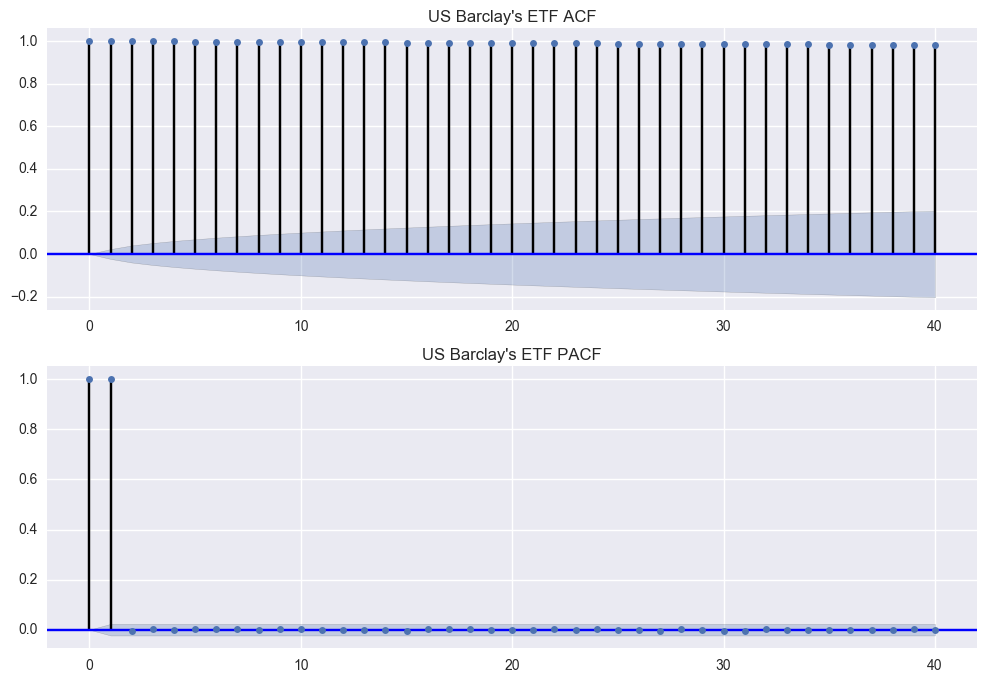

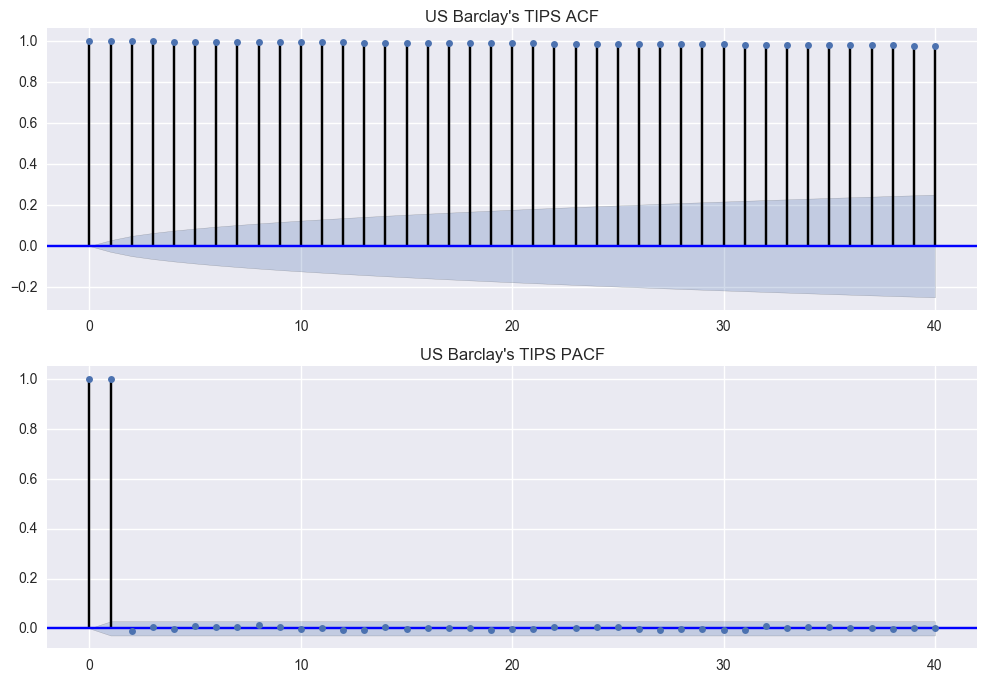

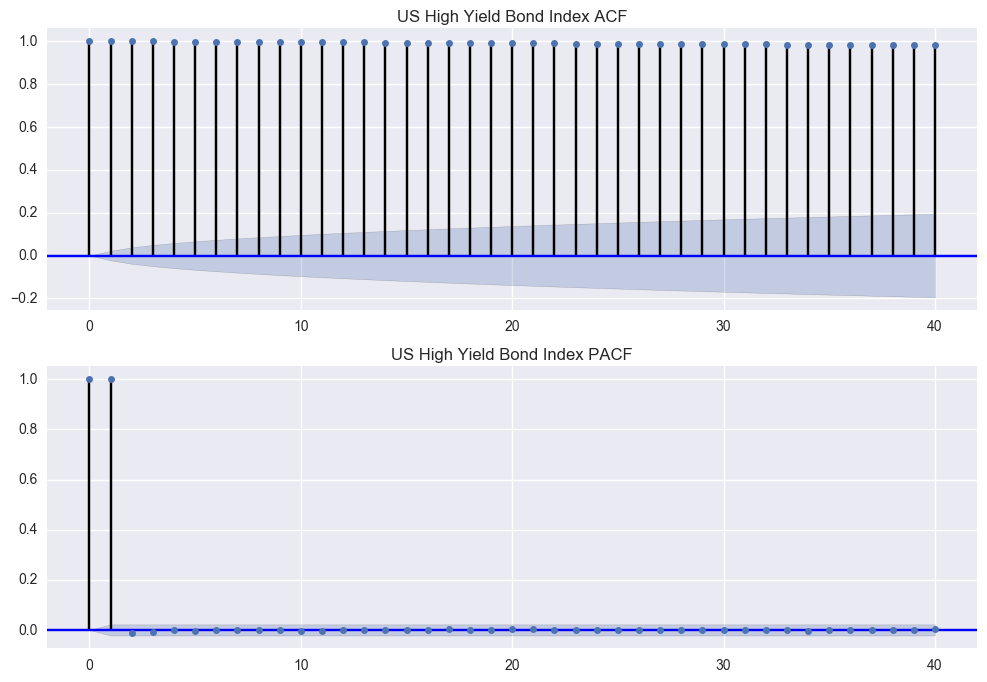

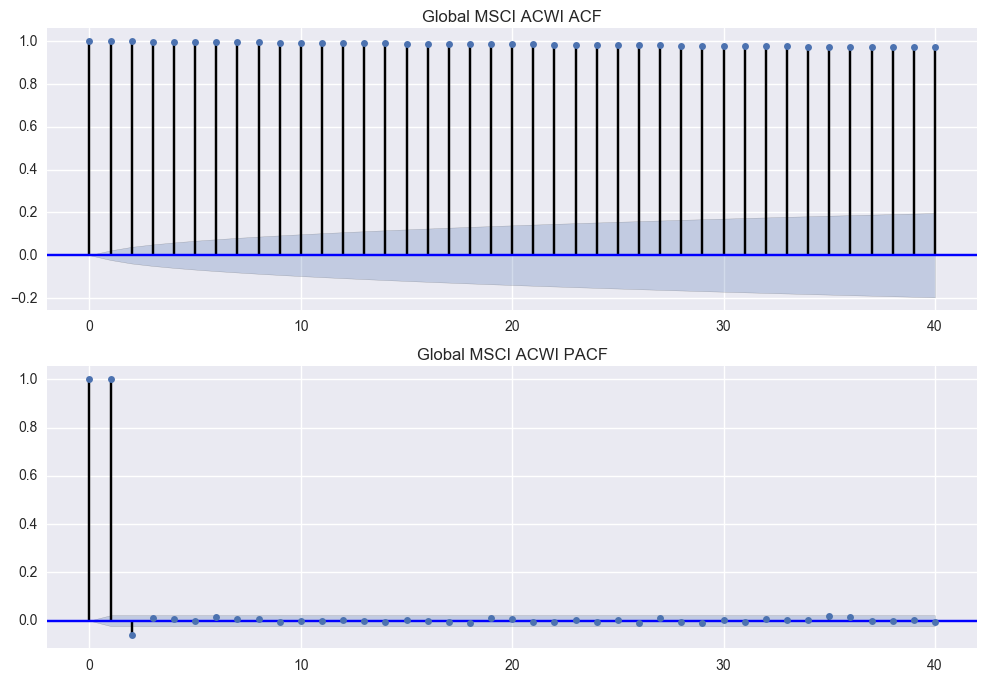

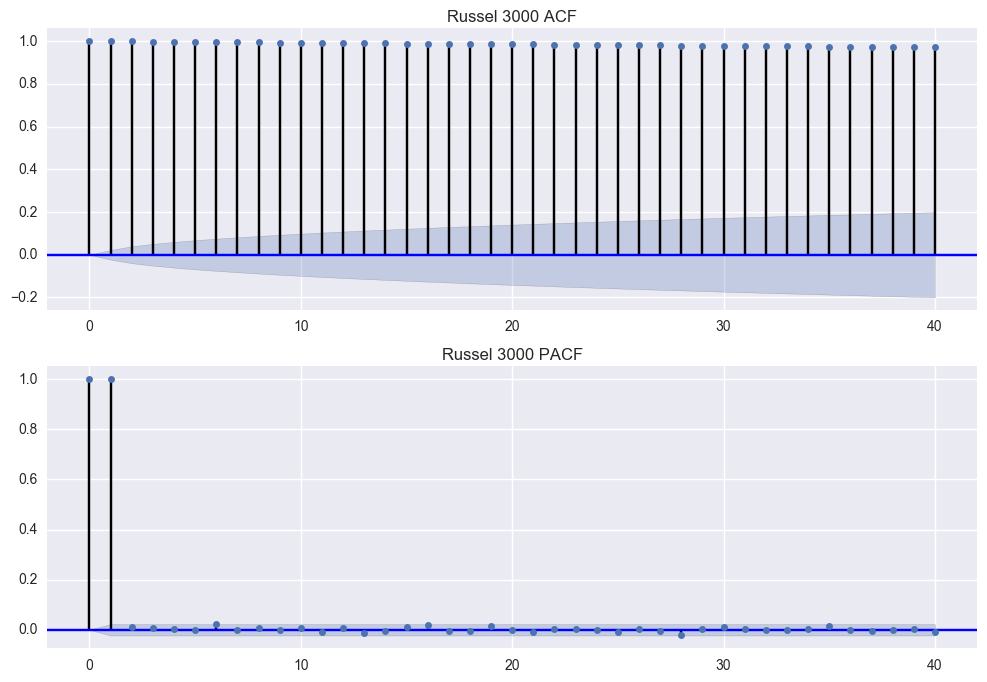

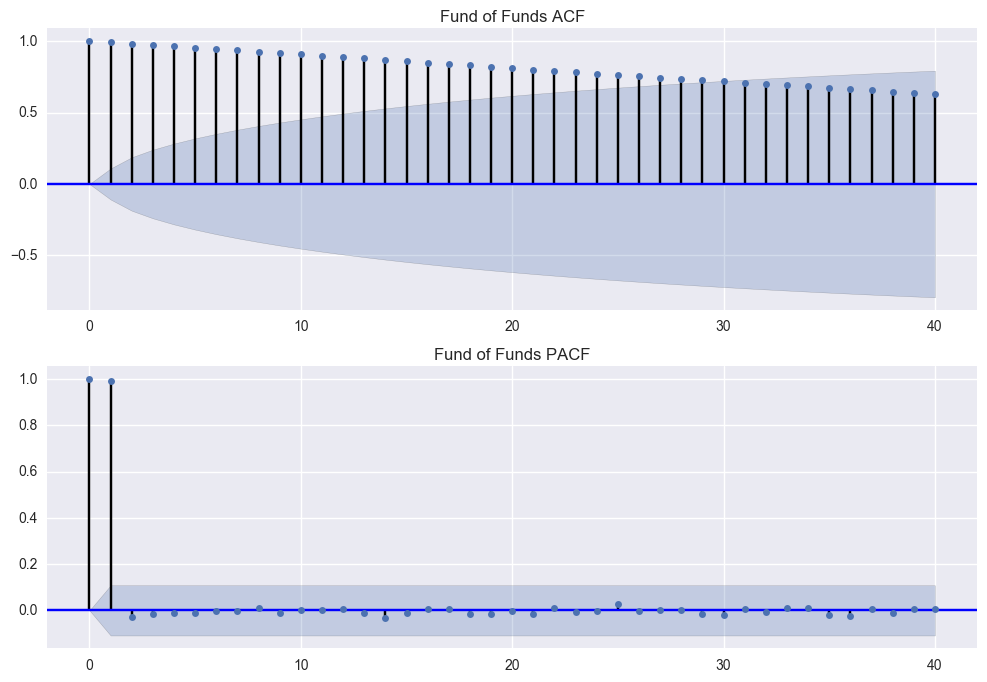

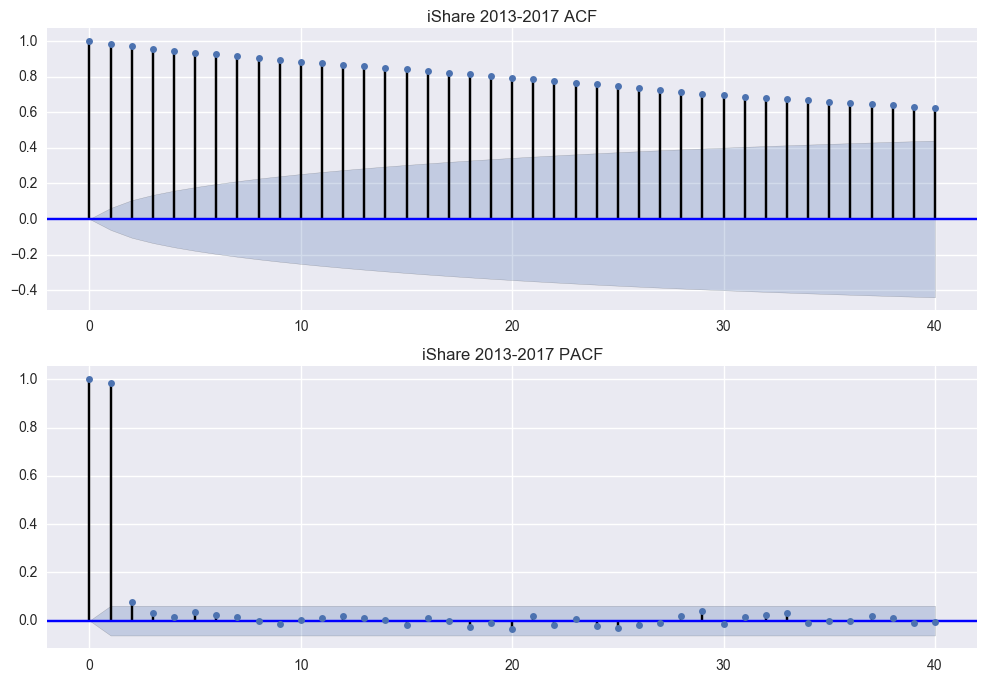

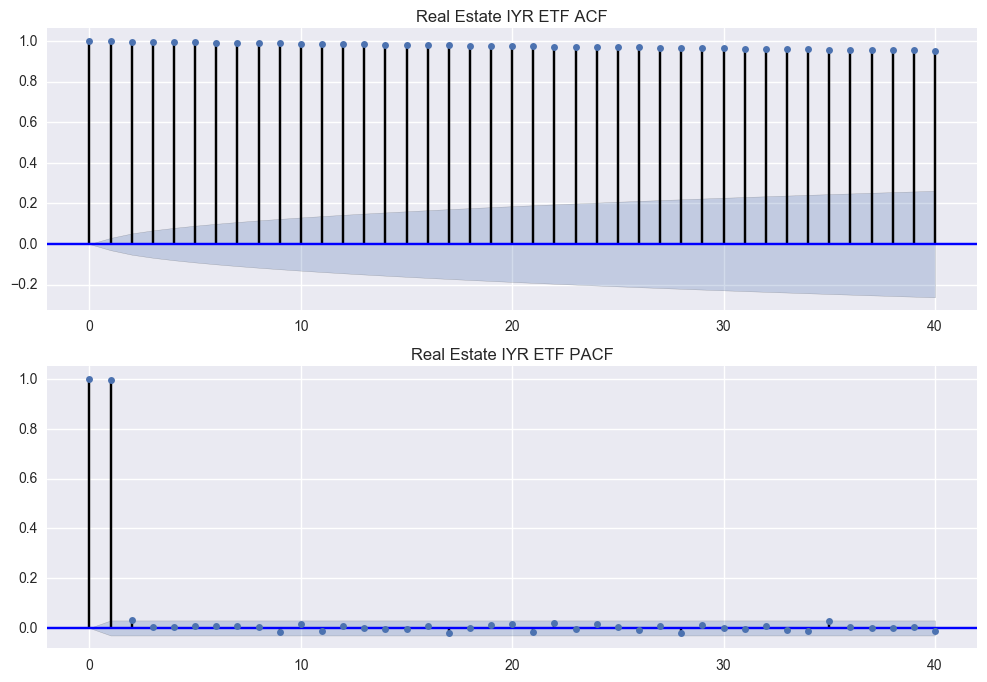

In [6]:
index = ['JPM EMB', 'US Barclay\'s ETF', 'US Barclay\'s TIPS', 'US High Yield Bond Index',
        'Global MSCI ACWI', 'Russel 3000', 'Fund of Funds', 'iShare 2013-2017',
        'Real Estate IYR ETF']

plot_acf_pacf_assets(df_jp_emb, df_jp_emb.columns[0], 
                     index[0])
plot_acf_pacf_assets(df_us_barc_etf, df_us_barc_etf.columns[0], 
                     index[1])
plot_acf_pacf_assets(df_us_barc_tips, df_us_barc_tips.columns[0], 
                     index[2])
plot_acf_pacf_assets(df_us_hy_bond, df_us_hy_bond.columns[0], 
                     index[3])
plot_acf_pacf_assets(df_global_msci, df_global_msci.columns[0], 
                     index[4])
plot_acf_pacf_assets(df_russel_3000, df_russel_3000.columns[0], 
                     index[5])
plot_acf_pacf_assets(df_fof, df_fof.columns[0], 
                     index[6])
plot_acf_pacf_assets(df_pe_PEX, df_pe_PEX.columns[0], 
                     index[7])
plot_acf_pacf_assets(df_re_iyr, df_re_iyr.columns[0], 
                     index[8])

In [7]:
## Getting ADF test values
arr = []
arr.append(adf_mean_reversion(df_jp_emb, df_jp_emb.columns[0])) 
arr.append(adf_mean_reversion(df_us_barc_etf, df_us_barc_etf.columns[0])) 
arr.append(adf_mean_reversion(df_us_barc_tips, df_us_barc_tips.columns[0])) 
arr.append(adf_mean_reversion(df_us_hy_bond, df_us_hy_bond.columns[0])) 
arr.append(adf_mean_reversion(df_global_msci, df_global_msci.columns[0])) 
arr.append(adf_mean_reversion(df_russel_3000, df_russel_3000.columns[0])) 
arr.append(adf_mean_reversion(df_fof, df_fof.columns[0])) 
arr.append(adf_mean_reversion(df_pe_PEX, df_pe_PEX.columns[0])) 
arr.append(adf_mean_reversion(df_re_iyr, df_re_iyr.columns[0])) 

In [8]:
df_assets_adf = pd.DataFrame(arr, columns=['P-Value', '1% Level'], index=index)
df_assets_adf

,P-Value,1% Level
JPM EMB,0.196575,-3.463987
US Barclay's ETF,0.988330,-3.431259
US Barclay's TIPS,0.964187,-3.431732
US High Yield Bond Index,0.019701,-3.431182
Global MSCI ACWI,0.548772,-3.431210
Russel 3000,0.211687,-3.431230
Fund of Funds,0.968606,-3.450695
iShare 2013-2017,0.159908,-3.436835
Real Estate IYR ETF,0.550263,-3.431907
